How to use splotch to plot one image per condition

beta_level_1 used in post-processing of splotch output
 /ahg/regevdata/projects/ST_SpatialTranscriptomics/splotch/scripts/assist/read_splotch_newOuputFolder.py used on cluster
 splotch_two_levels
 12 warmup samples
 same order of columns in count file and annotation file, used in splotch
 called /outputs/ST_43/splotch/output_v4 on the server

In [1]:
from __future__ import absolute_import, division, print_function

import os
import re
import glob
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pandas as pd

import seaborn as sns

from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

#from utils import (read_stan_csv, read_array_metadata,
#                           savagedickey, to_stan_variables,
#                           registration)

%matplotlib inline

matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

In [2]:
def read_array_metadata(metadata,filename,n_levels, extraplot=None):
    array_metadata = metadata[metadata['Count file'] == filename]
    array_levels = [array_metadata['Level %d'%(idx+1)].values[0] for idx in range(0,n_levels)]
    
    if extraplot != None:
        array_levels = array_metadata['Extra_plot_level'].tolist()
    return array_levels

In [158]:
# Load Lambda pmean df

path = '/Users/svickovi/Desktop/tags/exons/STB58'

# Read file
#filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_mRNA_6tags.tsv')

#Read file
#filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_mRNA_ifs.tsv')
 
lambda_posterior_means = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

print(lambda_posterior_means.head())

/Users/svickovi/miniconda3/envs/stenv3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245

file                /ahg/regevdata/projects/splotch_spatial_transcriptomics/outputs/splotch/STB58_spleen/exons/output/Count_Tables/10015CN88_E2_stdata_adjusted.tsv  \
coordinate                                                                                                                                                     9_27   
0610006L08Rik_15256                                -10.949095000000009                                                                                                
0610007P14Rik_1833                                  -4.549882333333332                                                                                                
0610010F05Rik_7886                                  -3.959941916666667                                                                                                
0610030E20Rik_9824                                  -4.826175333333334                                                                                               

In [124]:
print(len(lambda_posterior_means.index))

13723


In [161]:
# Load sample_information file
# Read file
#info_file = os.path.join(path, 'information_spleen_exons_mRNA_6tags.p')
info_file = os.path.join(path, 'information_spleen_exons_mRNA_ifs.p')
info = pickle.load(open(info_file,'rb')) 
    
metadata = info['metadata']
n_levels = info['n_levels']

print(metadata)
print(n_levels)

           Name Level 1                                         Count file  \
0  10015CN88_D1  Spleen  /ahg/regevdata/projects/splotch_spatial_transc...   
1  10015CN88_D2  Spleen  /ahg/regevdata/projects/splotch_spatial_transc...   
2  10015CN88_E1  Spleen  /ahg/regevdata/projects/splotch_spatial_transc...   
3  10015CN88_E2  Spleen  /ahg/regevdata/projects/splotch_spatial_transc...   

                                     Annotation file Image file  
0  /ahg/regevdata/projects/splotch_spatial_transc...     HE.jpg  
1  /ahg/regevdata/projects/splotch_spatial_transc...     HE.jpg  
2  /ahg/regevdata/projects/splotch_spatial_transc...     HE.jpg  
3  /ahg/regevdata/projects/splotch_spatial_transc...     HE.jpg  
1


In [162]:
# Take exp()
lambda_posterior_means = lambda_posterior_means.astype(float)
lambda_posterior_means = numpy.exp(lambda_posterior_means-1)

/Users/svickovi/miniconda3/envs/stenv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


# Plot individually sections

In [163]:
nwe=[]
nm=lambda_posterior_means.index
for item in nm:
    nwe.append(str(item).split("_")[0])
nwe

['0610006L08Rik',
 '0610007P14Rik',
 '0610010F05Rik',
 '0610030E20Rik',
 '0610031O16Rik',
 '0610033M10Rik',
 '0610037L13Rik',
 '0610040B10Rik',
 '0610040F04Rik',
 '1010001N08Rik',
 '1110002E22Rik',
 '1110003F10Rik',
 '1110004F10Rik',
 '1110008F13Rik',
 '1110008L16Rik',
 '1110015O18Rik',
 '1110018N20Rik',
 '1110028F11Rik',
 '1110032A03Rik',
 '1110034G24Rik',
 '1110035H17Rik',
 '1110037F02Rik',
 '1110046J04Rik',
 '1110059E24Rik',
 '1110059G10Rik',
 '1190002N15Rik',
 '1300002E11Rik',
 '1300017J02Rik',
 '1500004A13Rik',
 '1500011K16Rik',
 '1500012K07Rik',
 '1500015A07Rik',
 '1520401A03Rik',
 '1600012H06Rik',
 '1600012P17Rik',
 '1600014C10Rik',
 '1600020E01Rik',
 '1600029O15Rik',
 '1700001G01Rik',
 '1700001G17Rik',
 '1700003G18Rik',
 '1700007B14Rik',
 '1700007E05Rik',
 '1700007F19Rik',
 '1700008J07Rik',
 '1700010H22Rik',
 '1700010I02Rik',
 '1700010I14Rik',
 '1700011E24Rik',
 '1700012I11Rik',
 '1700015F17Rik',
 '1700016D06Rik',
 '1700016H13Rik',
 '1700017B05Rik',
 '1700017D01Rik',
 '1700017G

In [164]:
lambda_posterior_means.index = nwe
lambda_posterior_means.index

Index(['0610006L08Rik', '0610007P14Rik', '0610010F05Rik', '0610030E20Rik',
       '0610031O16Rik', '0610033M10Rik', '0610037L13Rik', '0610040B10Rik',
       '0610040F04Rik', '1010001N08Rik',
       ...
       'n-R5s33', 'n-R5s77', 'n-R5s88', 'n-R5s151', 'n-R5s161', 'n-R5s162',
       'n-R5s195', 'n-R5s205', 'n-R5s211', 'n-R5s213'],
      dtype='object', length=15902)

In [174]:
gene = 'Adgre1'

In [175]:
# get the names of the count files
count_files = numpy.array(list(lambda_posterior_means.columns.levels[0]))



6


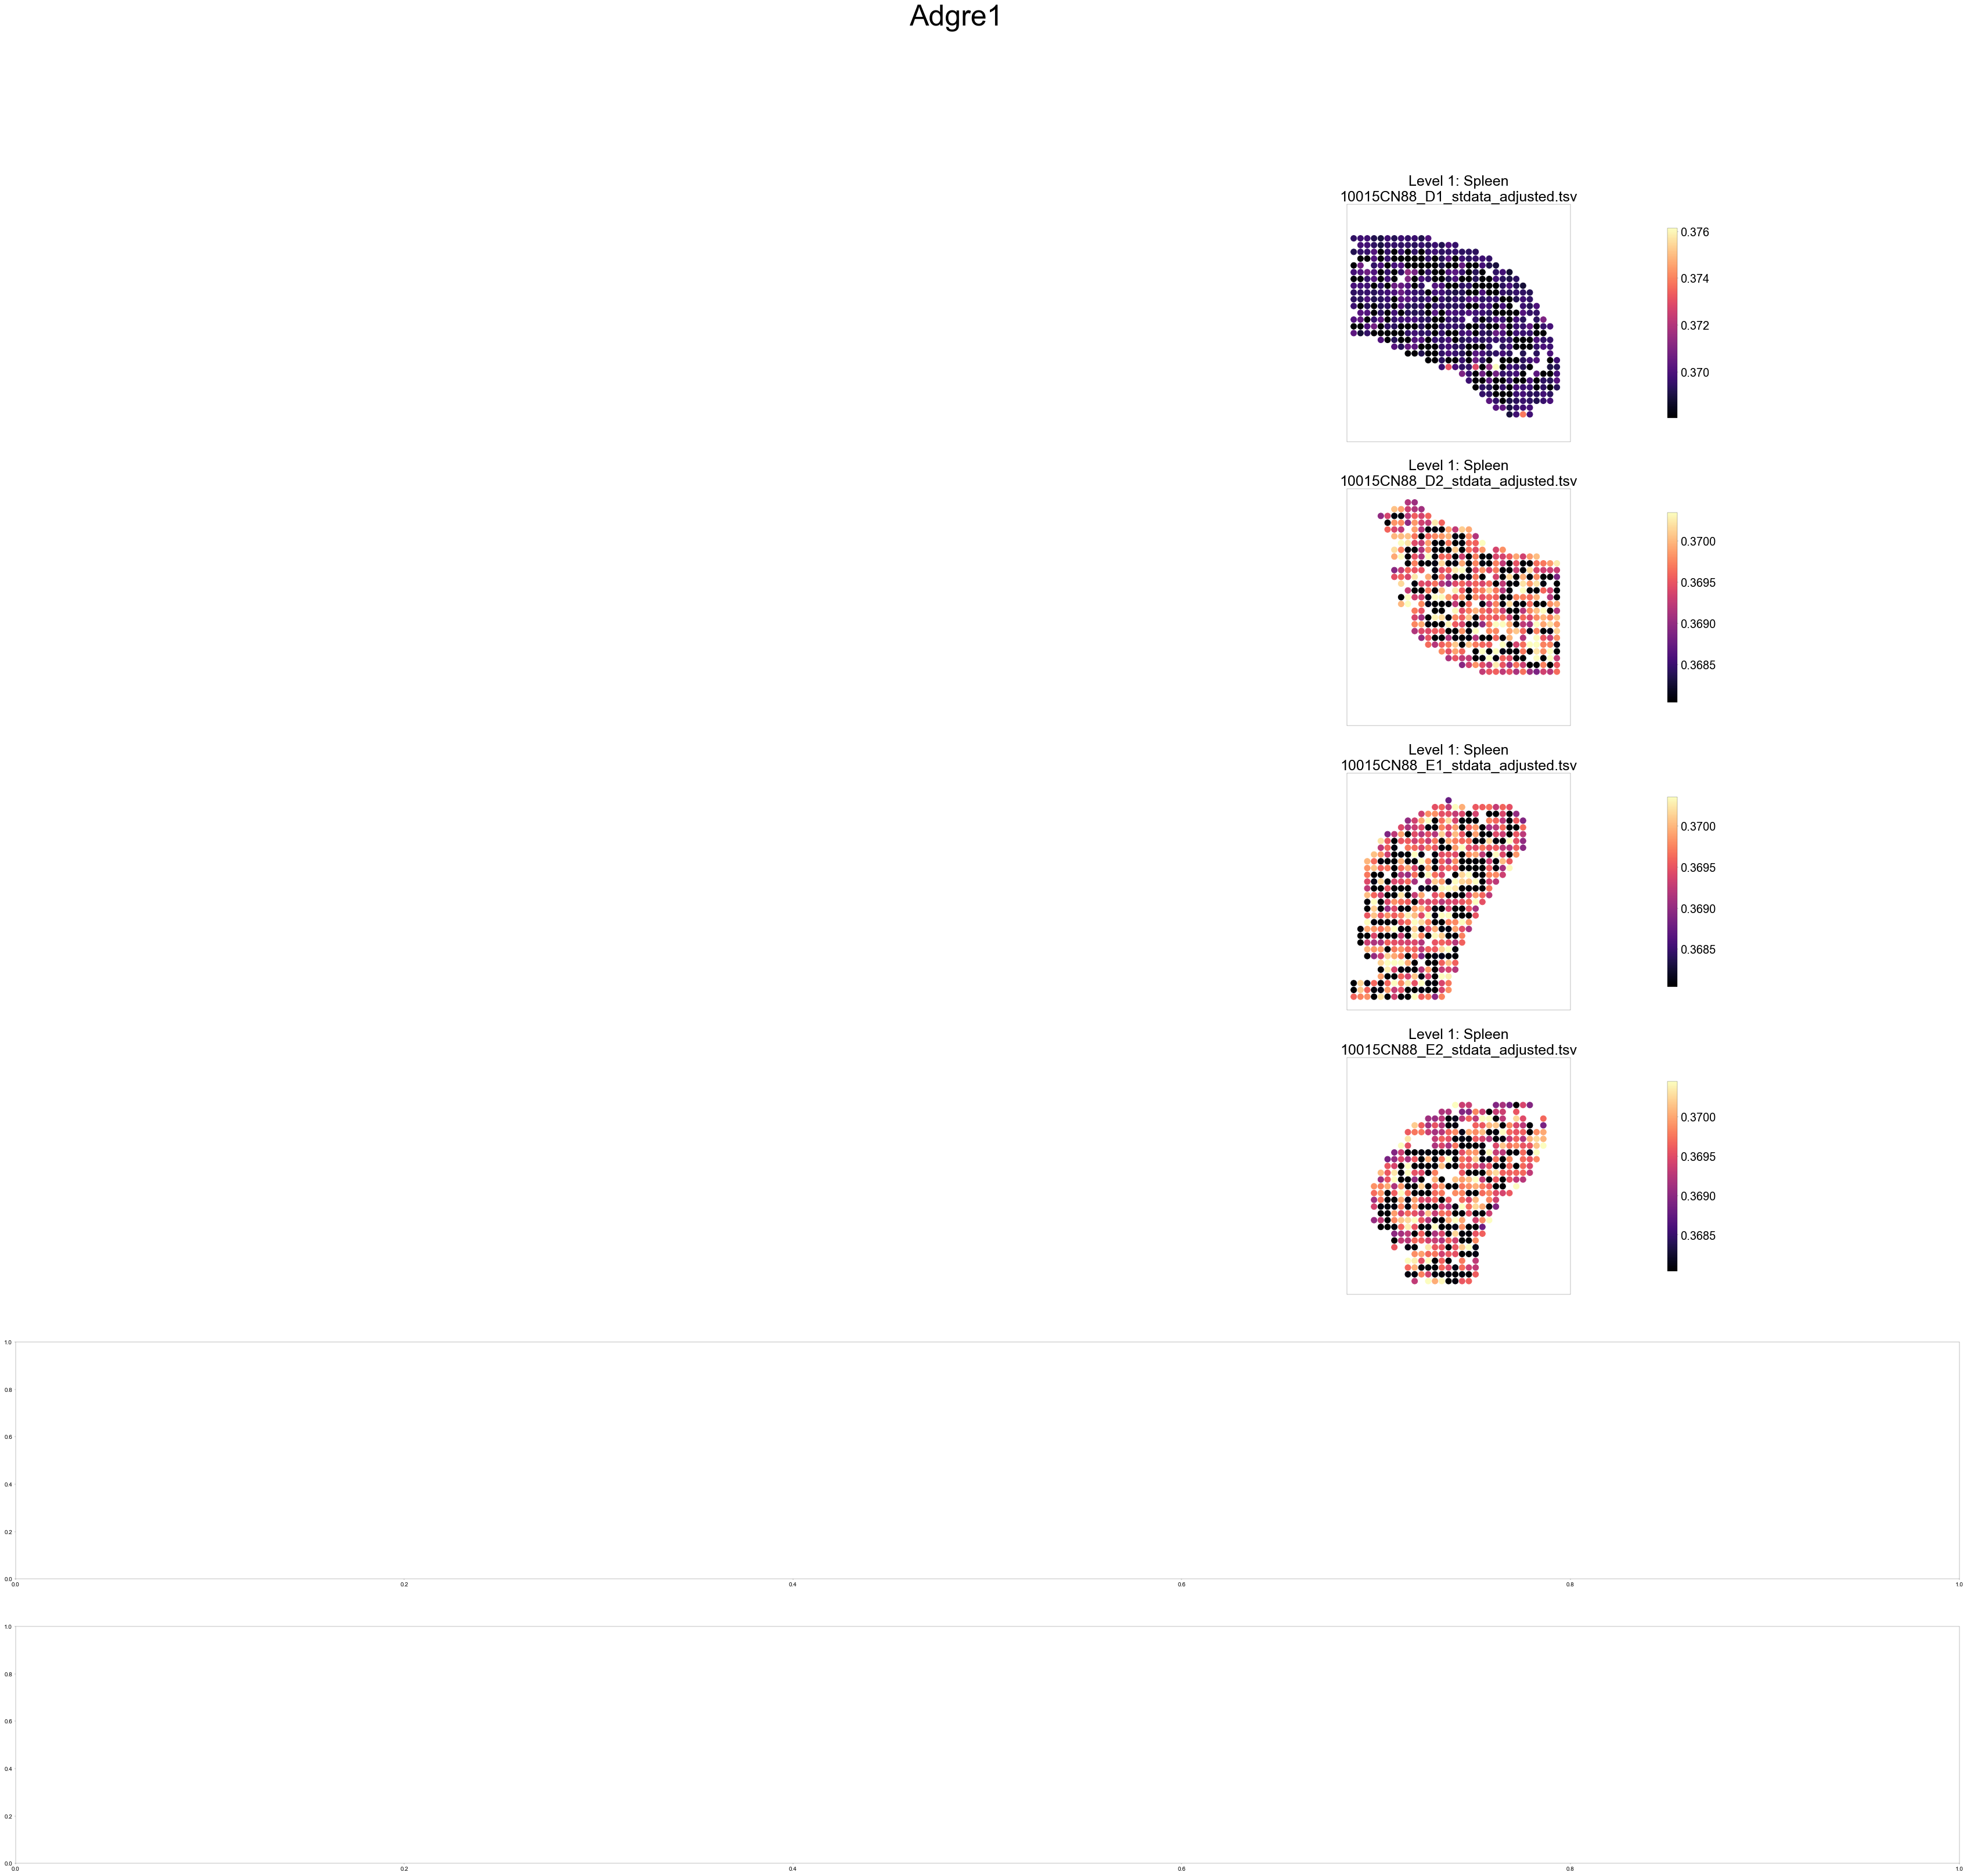

In [176]:
# initialize a figure
fig = matplotlib.pyplot.figure(figsize=(60, 60))

num_cols = 1

axes = []

for i in range(0,int((int(len(count_files)+2)/num_cols))):
    for j in range(0, num_cols):
        ax = plt.subplot2grid((int((len(count_files)+2)/num_cols+1), num_cols), (i, j))
        axes.append(ax) 
print(len(axes))

# get the names of the count files
count_files = numpy.array(list(lambda_posterior_means.columns.levels[0]))

# use the same color scale across the arrays
# vmin,vmax =5,numpy.percentile(lambda_posterior_means.loc[gene].values,100)

fig.suptitle(gene, fontsize=50)

# igd
# mins = [20,30,20,20]
# maxs = [100,100,99,100]

# f4
mins = [5,5,5,5]
maxs = [100,95,95,95]
# loop over the count files


for n, count_file in enumerate(count_files):
    
    

        
    ax = axes[n]

    coordinates = numpy.array([list(map(float,coordinate.split('_')))
                               for coordinate in list(lambda_posterior_means[count_file].columns)])
    
    x_coordinates = (coordinates[:,0]-1)
    y_coordinates = (coordinates[:,1]-1)
    
    # visualize the ST spots 
    s=100
    
    vmin = numpy.percentile(lambda_posterior_means[count_file].loc[gene].values,mins[n])
    vmax = numpy.percentile(lambda_posterior_means[count_file].loc[gene].values,maxs[n])
    
    cbmap = ax.scatter(x_coordinates,y_coordinates,
                       s=s,c=lambda_posterior_means[count_file].loc[gene],
                       cmap='magma',vmin=vmin,vmax=vmax,marker='o')
    
    ax.set_aspect('equal')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlim(0, 33)
    ax.set_ylim(35,0)
    
    # put some information on the array in the title
    ax.set_title('%s\n%s'%(
        '\n'.join(['Level %d: %s'%(level_idx+1,level)
                   for level_idx,level in enumerate(list(map(str,read_array_metadata(metadata,count_file,n_levels))))]),count_file.split('/')[-1]), fontsize=25)
    
    cbar = matplotlib.pyplot.colorbar(cbmap,ax=ax,shrink=0.8)
    cbar.ax.tick_params(labelsize=20) 
    
    #cbar.set_label(r'%s $\bar{\lambda}$'%(gene), fontsize=25)
    
fig.subplots_adjust(top=0.90)
#fig.savefig(gene+'_exons.pdf')

In [117]:
len(count_files)

4